In [86]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt

def throughoutOutliers(data):
    for i in range(1,len(data)):
        if(np.abs(data[i]-data[i-1])>0.2):
            data[i]=(data[i-1]+data[i+1])/2
    return data

In [92]:
trail1 =np.loadtxt("norm/1011_RXC.txt",)
trail1[0]=throughoutOutliers(trail1[0])
#trail1[1]=throughoutOutliers(trail1[1])
#trail1[2]=throughoutOutliers(trail1[2])
#trail1[3]=throughoutOutliers(trail1[3])
trail2 =np.loadtxt("norm/1013_RXC.txt",)
trail2[0]=throughoutOutliers(trail2[0])
trail2[1]=throughoutOutliers(trail2[1])
trail2[2]=throughoutOutliers(trail2[2])
trail2[3]=throughoutOutliers(trail2[3])
trail3 =np.loadtxt("norm/1013_RXCa.txt",)
trail3[0]=throughoutOutliers(trail3[0])
trail3[1]=throughoutOutliers(trail3[1])
trail3[2]=throughoutOutliers(trail3[2])
trail3[3]=throughoutOutliers(trail3[3])
trail4 =np.loadtxt("norm/1016_RXC.txt",)
trail4[0]=throughoutOutliers(trail4[0])
trail4[1]=throughoutOutliers(trail4[1])
trail4[2]=throughoutOutliers(trail4[2])
trail4[3]=throughoutOutliers(trail4[3])
trail5 =np.loadtxt("norm/1016_RXCb.txt",)
trail4[0]=throughoutOutliers(trail4[0])
trail4[1]=throughoutOutliers(trail4[1])
trail4[2]=throughoutOutliers(trail4[2])
trail4[3]=throughoutOutliers(trail4[3])
trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)

In [96]:
xrange=np.linspace(0,60,len(trail3[0]))

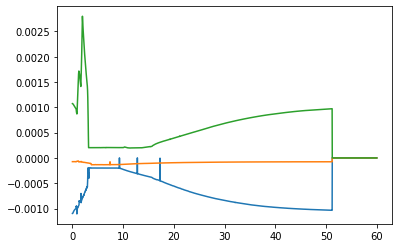

In [98]:
#plt.plot(xrange,trail3[0])
plt.plot(xrange,trail3[1])
plt.plot(xrange,trail3[2])
plt.plot(xrange,trail3[3])

In [57]:
(trail1[0][1-1]+trail1[0][1+1])/2

0.73952085

In [75]:
np.where()

array([0.7395081, 0.7395247, 0.7395336, ..., 0.5427855, 0.5427782,
       0.542777 ])